In [273]:
## Converting String in to Float
## Checking Missing Values
## Treating Missing Values
## Statistics
## checking correlation using pearson method
## VectorAssembler
## Standard Scaling
## PCA

In [274]:
# import pyspark
# import numpy as np
# import pandas as pd

# from pyspark.sql import SparkSession
# from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, PCA

# from pyspark.mllib.feature import StandardScaler, PCA
# from pyspark.mllib.stat import Statistics

##### mllib for RDD and ml for DataFrame

In [275]:
import pyspark
import numpy as np
import pandas as pd

from pyspark.sql import SparkSession

from pyspark.mllib.feature import StandardScaler as StandardScalerMLLib, PCA as PCAMLLib
from pyspark.mllib.stat import Statistics

from pyspark.ml.feature import StandardScaler as StandardScalerML, PCA as PCAML
from pyspark.ml.feature import VectorAssembler

In [276]:
spark = SparkSession.builder.appName("DataFrame Preprocessing").getOrCreate()

In [277]:
dataset = spark.read.csv("Admission_Predict.csv", header=True, inferSchema=True)

In [278]:
dataset.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|      302|        102|                1|2.0| 1.5| 8.0|       0|             0.5|
|     NULL|     

In [279]:
# For example make all the columns as string
dataset=dataset.select([dataset[col].cast("string") for col in dataset.columns])

In [280]:
dataset.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|      302|        102|                1|2.0| 1.5| 8.0|       0|             0.5|
|     NULL|     

In [281]:
dataset.printSchema()

root
 |-- GRE Score: string (nullable = true)
 |-- TOEFL Score: string (nullable = true)
 |-- University Rating: string (nullable = true)
 |-- SOP: string (nullable = true)
 |-- LOR : string (nullable = true)
 |-- CGPA: string (nullable = true)
 |-- Research: string (nullable = true)
 |-- Chance of Admit : string (nullable = true)



## Converting String into Float

In [282]:
from pyspark.sql.functions import col
new_data = dataset.select([col(c).cast("float") for c in dataset.columns])
# new_data = dataset.select([dataset[c].cast("float") for c in dataset.columns])
# new_data = dataset.select(*(col(c).cast("float") for c in dataset.columns))

In [283]:
new_data.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|            0.75|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|            0.68|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|             0.5|
|     NULL|     

In [284]:
new_data.printSchema()

root
 |-- GRE Score: float (nullable = true)
 |-- TOEFL Score: float (nullable = true)
 |-- University Rating: float (nullable = true)
 |-- SOP: float (nullable = true)
 |-- LOR : float (nullable = true)
 |-- CGPA: float (nullable = true)
 |-- Research: float (nullable = true)
 |-- Chance of Admit : float (nullable = true)



## Checking Missing Values

In [285]:
from pyspark.sql.functions import col, count, isnan, when
#checking for null ir nan type values in our columns
new_data.select([count(when(col(c).isNull(), c)).alias(c) for c in new_data.columns]).show()
# new_data.select([count(when(isnan(c), c)).alias(c) for c in new_data.columns]).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|        2|          2|                0|  0|   0|   0|       0|               0|
+---------+-----------+-----------------+---+----+----+--------+----------------+



## Treating Missing Values

In [286]:
new_data.filter(
    sum([when(col(c).isNull() | isnan(c), 1).otherwise(0) for c in new_data.columns]) > 0
).show()
# new_data.filter(col("GRE Score").isNull() | col("TOEFL Score").isNull()).show()
# new_data.filter(new_data["GRE Score"].isNull() | new_data["TOEFL Score"].isNull()).show()


+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|     NULL|      108.0|              3.0|3.5| 3.0| 8.6|     0.0|            0.45|
|     NULL|      106.0|              3.0|3.5| 4.0| 8.4|     1.0|            0.52|
|    328.0|       NULL|              4.0|4.0| 4.5| 9.1|     1.0|            0.78|
|    317.0|       NULL|              2.0|3.0| 3.0|8.76|     0.0|            0.77|
+---------+-----------+-----------------+---+----+----+--------+----------------+



In [287]:
# data_without_missing = dataset.dropna(how='any')
# data_without_missing = dataset.dropna(how='all')

In [288]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["GRE Score", "TOEFL Score"],
                  outputCols=["GRE Score", "TOEFL Score"])
model = imputer.fit(new_data)

imputed_data = model.transform(new_data)

In [289]:
imputed_data.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|            0.75|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|            0.68|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|             0.5|
|316.77136|     

In [290]:
from pyspark.sql.functions import col, count, isnan, when
#checking for null ir nan type values in our columns
imputed_data.select([count(when(col(c).isNull(), c)).alias(c) for c in imputed_data.columns]).show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|        0|          0|                0|  0|   0|   0|       0|               0|
+---------+-----------+-----------------+---+----+----+--------+----------------+



In [291]:
#data_without_missing.show()

In [292]:
imputed_data.count()

400

In [293]:
# help(imputed_data.corr)

    Parameters
    ----------
    col1 : str
        The name of the first column
    col2 : str
        The name of the second column
    method : str, optional
        The correlation method. Currently only supports "pearson"

In [294]:
# Use Statistics to compute correlation instead of using the corr method

In [295]:
for c in imputed_data.columns:
    print("Correlation to Chance of Admit for ", c, imputed_data.stat.corr('Chance of Admit ', c))

imputed_data.corr('TOEFL Score','Chance of Admit ')

Correlation to Chance of Admit for  GRE Score 0.8086197059318181
Correlation to Chance of Admit for  TOEFL Score 0.7921859068724981
Correlation to Chance of Admit for  University Rating 0.7112502514556419
Correlation to Chance of Admit for  SOP 0.6757318595736796
Correlation to Chance of Admit for  LOR  0.6698887907540485
Correlation to Chance of Admit for  CGPA 0.8732890926720879
Correlation to Chance of Admit for  Research 0.5532021374072643
Correlation to Chance of Admit for  Chance of Admit  1.0


0.7921859068724981

In [296]:
imputed_data.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [297]:
imputed_data = imputed_data.withColumnRenamed('Chance of Admit ', 'Chance of Admit')

In [298]:
features = imputed_data.drop('Chance of Admit')

In [299]:
# we need to convert dataframe intp a RDD to check for correlation
col_names = features.columns
features_rdd = features.rdd

In [300]:
col_names

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

In [301]:
features_rdd.collect()

[Row(GRE Score=337.0, TOEFL Score=118.0, University Rating=4.0, SOP=4.5, LOR =4.5, CGPA=9.649999618530273, Research=1.0),
 Row(GRE Score=324.0, TOEFL Score=107.0, University Rating=4.0, SOP=4.0, LOR =4.5, CGPA=8.869999885559082, Research=1.0),
 Row(GRE Score=316.0, TOEFL Score=104.0, University Rating=3.0, SOP=3.0, LOR =3.5, CGPA=8.0, Research=1.0),
 Row(GRE Score=322.0, TOEFL Score=110.0, University Rating=3.0, SOP=3.5, LOR =2.5, CGPA=8.670000076293945, Research=1.0),
 Row(GRE Score=314.0, TOEFL Score=103.0, University Rating=2.0, SOP=2.0, LOR =3.0, CGPA=8.210000038146973, Research=0.0),
 Row(GRE Score=330.0, TOEFL Score=115.0, University Rating=5.0, SOP=4.5, LOR =3.0, CGPA=9.34000015258789, Research=1.0),
 Row(GRE Score=321.0, TOEFL Score=109.0, University Rating=3.0, SOP=3.0, LOR =4.0, CGPA=8.199999809265137, Research=1.0),
 Row(GRE Score=308.0, TOEFL Score=101.0, University Rating=2.0, SOP=3.0, LOR =4.0, CGPA=7.900000095367432, Research=0.0),
 Row(GRE Score=302.0, TOEFL Score=102.0

In [302]:
features_rdd = features.rdd.map(lambda row: list(row[0:]))

In [303]:
features_rdd.collect()

[[337.0, 118.0, 4.0, 4.5, 4.5, 9.649999618530273, 1.0],
 [324.0, 107.0, 4.0, 4.0, 4.5, 8.869999885559082, 1.0],
 [316.0, 104.0, 3.0, 3.0, 3.5, 8.0, 1.0],
 [322.0, 110.0, 3.0, 3.5, 2.5, 8.670000076293945, 1.0],
 [314.0, 103.0, 2.0, 2.0, 3.0, 8.210000038146973, 0.0],
 [330.0, 115.0, 5.0, 4.5, 3.0, 9.34000015258789, 1.0],
 [321.0, 109.0, 3.0, 3.0, 4.0, 8.199999809265137, 1.0],
 [308.0, 101.0, 2.0, 3.0, 4.0, 7.900000095367432, 0.0],
 [302.0, 102.0, 1.0, 2.0, 1.5, 8.0, 0.0],
 [316.7713623046875, 108.0, 3.0, 3.5, 3.0, 8.600000381469727, 0.0],
 [316.7713623046875, 106.0, 3.0, 3.5, 4.0, 8.399999618530273, 1.0],
 [327.0, 111.0, 4.0, 4.0, 4.5, 9.0, 1.0],
 [328.0, 107.40703582763672, 4.0, 4.0, 4.5, 9.100000381469727, 1.0],
 [307.0, 109.0, 3.0, 4.0, 3.0, 8.0, 1.0],
 [311.0, 104.0, 3.0, 3.5, 2.0, 8.199999809265137, 1.0],
 [314.0, 105.0, 3.0, 3.5, 2.5, 8.300000190734863, 0.0],
 [317.0, 107.0, 3.0, 4.0, 3.0, 8.699999809265137, 0.0],
 [319.0, 106.0, 3.0, 4.0, 3.0, 8.0, 1.0],
 [318.0, 110.0, 3.0, 4.0, 

## Statistics

In [304]:
imputed_data.columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit']

In [305]:
imputed_data = imputed_data.select([col(c).cast("string").alias(c) for c in imputed_data.columns])

In [306]:
imputed_data.printSchema()

root
 |-- GRE Score: string (nullable = true)
 |-- TOEFL Score: string (nullable = true)
 |-- University Rating: string (nullable = true)
 |-- SOP: string (nullable = true)
 |-- LOR : string (nullable = true)
 |-- CGPA: string (nullable = true)
 |-- Research: string (nullable = true)
 |-- Chance of Admit: string (nullable = true)



In [307]:
# help(imputed_data.describe)

    Parameters
    ----------
    cols : str, list, optional
         Column name or list of column names to describe by (default All columns).

In [308]:
imputed_data.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|summary|         GRE Score|       TOEFL Score| University Rating|              SOP|              LOR |              CGPA|           Research|   Chance of Admit|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|  count|               400|               400|               400|              400|               400|               400|                400|               400|
|   mean|       316.7713568|107.40703518000001|            3.0875|              3.4|            3.4525| 8.598924999999998|             0.5475|0.7243499999999996|
| stddev|11.462064866150046| 6.062758725380244|1.1437281298838986|1.006868641458697|0.8984775482792569|0.5963170964964315|0.49836197853983155|0.1426093301738409|
|    min|             290.0|

In [309]:
imputed_data = imputed_data.select([col(c).cast("float").alias(c) for c in imputed_data.columns])
imputed_data.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+
|summary|         GRE Score|       TOEFL Score| University Rating|              SOP|              LOR |              CGPA|           Research|    Chance of Admit|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+
|  count|               400|               400|               400|              400|               400|               400|                400|                400|
|   mean|316.77135681152345|107.40703517913818|            3.0875|              3.4|            3.4525| 8.598925005197525|             0.5475| 0.7243499991297722|
| stddev| 11.46206486615006|6.0627587253802435|1.1437281298838986|1.006868641458697|0.8984775482792569|0.5963170789619662|0.49836197853983155|0.14260933092847422|
|    min|             

In [310]:
summary = Statistics.colStats(features_rdd)
print(summary.mean().tolist())  # a dense vector containing the mean value for each column
print(summary.variance().tolist())  # column-wise variance
print(summary.numNonzeros().tolist())  # number of nonzeros in each column
print(summary.normL1().tolist())# return a column of normL1 summary
print(summary.normL2().tolist())# return a column of normL2 summary
print(summary.max().tolist())# return a column of max summary
print(summary.min().tolist())# return a column of min summary
print(summary.count())# return a column of count summary

[316.7713568115237, 107.40703517913819, 3.087500000000001, 3.399999999999998, 3.4525000000000015, 8.598925005197536, 0.5475]
[131.37893099583164, 36.75704336217429, 1.3081140350877198, 1.013784461152882, 0.8072619047619045, 0.35559405866173177, 0.24836466165413534]
[400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 219.0]
[126708.54272460938, 42962.81407165527, 1235.0, 1360.0, 1381.0, 3439.57000207901, 219.0]
[6339.562854957172, 2151.5516593125435, 65.84071688552609, 70.91191719309245, 71.34423592694787, 172.39050590856337, 14.798648586948742]
[340.0, 120.0, 5.0, 5.0, 5.0, 9.920000076293945, 1.0]
[290.0, 92.0, 1.0, 1.0, 1.0, 6.800000190734863, 0.0]
400


#### NormL1
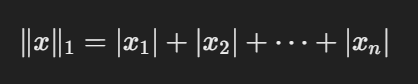
#### NormL2
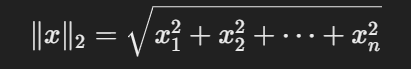

# Checking correlation using pearson method

In [311]:
import seaborn as sns

In [312]:
corr_mat=Statistics.corr(features_rdd, method="pearson")
corr_mat.shape

(7, 7)

In [313]:
corr_df = pd.DataFrame(corr_mat)
corr_df

,0,1,2,3,4,5,6
0,1.000000,0.836208,0.669894,0.613136,0.557707,0.834500,0.580840
1,0.836208,1.000000,0.693511,0.657023,0.565431,0.828125,0.487132
2,0.669894,0.693511,1.000000,0.734523,0.660123,0.746479,0.447783
3,0.613136,0.657023,0.734523,1.000000,0.729593,0.718144,0.444029
4,0.557707,0.565431,0.660123,0.729593,1.000000,0.670211,0.396859
5,0.834500,0.828125,0.746479,0.718144,0.670211,1.000000,0.521654
6,0.580840,0.487132,0.447783,0.444029,0.396859,0.521654,1.000000


In [314]:
corr_df.index, corr_df.columns = col_names, col_names
corr_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.836208,0.669894,0.613136,0.557707,0.834500,0.580840
TOEFL Score,0.836208,1.000000,0.693511,0.657023,0.565431,0.828125,0.487132
University Rating,0.669894,0.693511,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.613136,0.657023,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557707,0.565431,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.834500,0.828125,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580840,0.487132,0.447783,0.444029,0.396859,0.521654,1.000000


In [315]:
corr_mat=Statistics.corr(features_rdd, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

In [316]:
corr_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [317]:
corr_df.index

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [318]:
corr_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.836208,0.669894,0.613136,0.557707,0.834500,0.580840
TOEFL Score,0.836208,1.000000,0.693511,0.657023,0.565431,0.828125,0.487132
University Rating,0.669894,0.693511,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.613136,0.657023,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557707,0.565431,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.834500,0.828125,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580840,0.487132,0.447783,0.444029,0.396859,0.521654,1.000000


<Axes: >

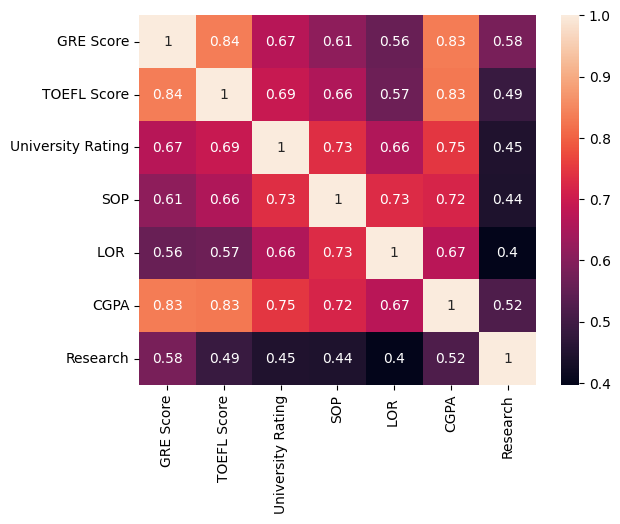

In [319]:
sns.heatmap(corr_df, annot=True)

<Axes: >

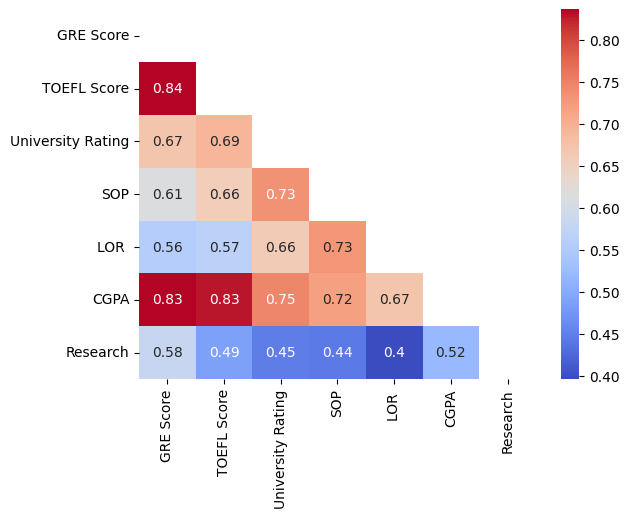

In [320]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', xticklabels=col_names, yticklabels=col_names, mask=np.triu(corr_mat))

<Axes: >

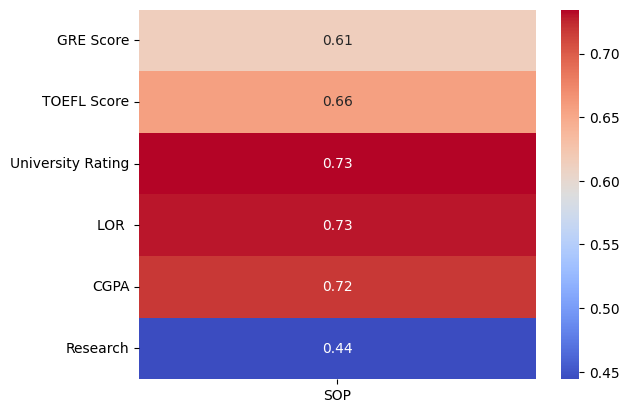

In [321]:
sns.heatmap(corr_df[["SOP"]].drop("SOP"), annot=True, cmap='coolwarm')

<Axes: >

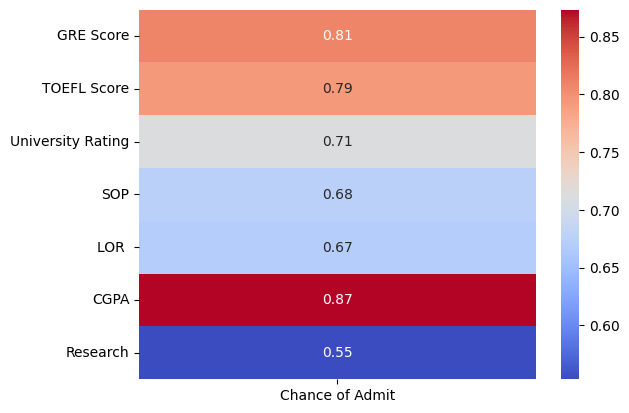

In [322]:
imputeddf = imputed_data.toPandas()

corr = imputeddf.corr()
sns.heatmap(corr["Chance of Admit"].to_frame().drop("Chance of Admit"), annot=True, cmap='coolwarm')

In [323]:
coa = corr["Chance of Admit"].drop("Chance of Admit")
coa

GRE Score            0.808620
TOEFL Score          0.792186
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Name: Chance of Admit, dtype: float64

In [324]:
coa = coa.abs().sort_values(ascending=False)
coa

CGPA                 0.873289
GRE Score            0.808620
TOEFL Score          0.792186
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit, dtype: float64

<Axes: >

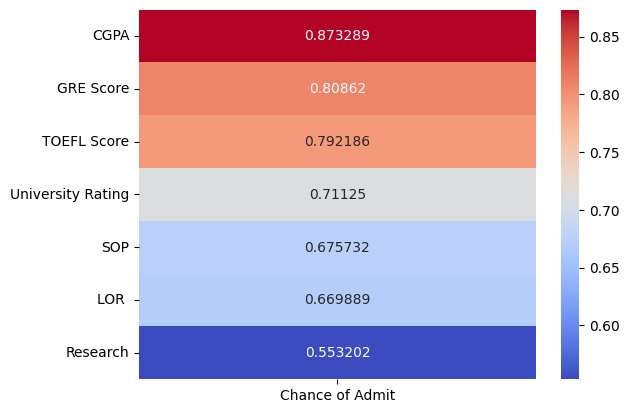

In [325]:
sns.heatmap(coa.to_frame(), annot=True, cmap='coolwarm', fmt="g")

## VectorAssembler

In [326]:
imputed_data.show()

+---------+-----------+-----------------+---+----+----+--------+---------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit|
+---------+-----------+-----------------+---+----+----+--------+---------------+
|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|           0.92|
|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|           0.76|
|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|           0.72|
|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|            0.8|
|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|           0.65|
|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|            0.9|
|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|           0.75|
|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|           0.68|
|    302.0|      102.0|              1.0|2.0| 1.5| 8.0|     0.0|            0.5|
|316.77136|      108.0|     

In [327]:
features = imputed_data.drop('Chance of Admit')

In [328]:
assembler = VectorAssembler(inputCols=features.columns,outputCol="features")

In [329]:
output = assembler.transform(imputed_data)

In [422]:
data = output.select("features", "Chance of Admit")

In [423]:
data.show()

+--------------------+---------------+
|            features|Chance of Admit|
+--------------------+---------------+
|[337.0,118.0,4.0,...|           0.92|
|[324.0,107.0,4.0,...|           0.76|
|[316.0,104.0,3.0,...|           0.72|
|[322.0,110.0,3.0,...|            0.8|
|[314.0,103.0,2.0,...|           0.65|
|[330.0,115.0,5.0,...|            0.9|
|[321.0,109.0,3.0,...|           0.75|
|[308.0,101.0,2.0,...|           0.68|
|[302.0,102.0,1.0,...|            0.5|
|[316.771362304687...|           0.45|
|[316.771362304687...|           0.52|
|[327.0,111.0,4.0,...|           0.84|
|[328.0,107.407035...|           0.78|
|[307.0,109.0,3.0,...|           0.62|
|[311.0,104.0,3.0,...|           0.61|
|[314.0,105.0,3.0,...|           0.54|
|[317.0,107.0,3.0,...|           0.66|
|[319.0,106.0,3.0,...|           0.65|
|[318.0,110.0,3.0,...|           0.63|
|[303.0,102.0,3.0,...|           0.62|
+--------------------+---------------+
only showing top 20 rows



# Standard Scaling

#### Two ways to standardize the data

---

#### 1. Using StandardScaler from pyspark.mllib.feature

In [331]:
label = imputed_data.select('Chance of Admit')

In [332]:
label.show()

+---------------+
|Chance of Admit|
+---------------+
|           0.92|
|           0.76|
|           0.72|
|            0.8|
|           0.65|
|            0.9|
|           0.75|
|           0.68|
|            0.5|
|           0.45|
|           0.52|
|           0.84|
|           0.78|
|           0.62|
|           0.61|
|           0.54|
|           0.66|
|           0.65|
|           0.63|
|           0.62|
+---------------+
only showing top 20 rows



In [333]:
# label.collect()

In [334]:
features = imputed_data.drop('Chance of Admit')

In [ ]:
# output.select("features", "Chance of Admit").show(truncate=False)

+------------------------------------------------------------+---------------+
|features                                                    |Chance of Admit|
+------------------------------------------------------------+---------------+
|[337.0,118.0,4.0,4.5,4.5,9.649999618530273,1.0]             |0.92           |
|[324.0,107.0,4.0,4.0,4.5,8.869999885559082,1.0]             |0.76           |
|[316.0,104.0,3.0,3.0,3.5,8.0,1.0]                           |0.72           |
|[322.0,110.0,3.0,3.5,2.5,8.670000076293945,1.0]             |0.8            |
|[314.0,103.0,2.0,2.0,3.0,8.210000038146973,0.0]             |0.65           |
|[330.0,115.0,5.0,4.5,3.0,9.34000015258789,1.0]              |0.9            |
|[321.0,109.0,3.0,3.0,4.0,8.199999809265137,1.0]             |0.75           |
|[308.0,101.0,2.0,3.0,4.0,7.900000095367432,0.0]             |0.68           |
|[302.0,102.0,1.0,2.0,1.5,8.0,0.0]                           |0.5            |
|[316.7713623046875,108.0,3.0,3.5,3.0,8.600000381469

In [424]:
features_rdd = data.select("features").rdd.map(lambda row: row[0].tolist())
features_rdd.collect()

[[337.0, 118.0, 4.0, 4.5, 4.5, 9.649999618530273, 1.0],
 [324.0, 107.0, 4.0, 4.0, 4.5, 8.869999885559082, 1.0],
 [316.0, 104.0, 3.0, 3.0, 3.5, 8.0, 1.0],
 [322.0, 110.0, 3.0, 3.5, 2.5, 8.670000076293945, 1.0],
 [314.0, 103.0, 2.0, 2.0, 3.0, 8.210000038146973, 0.0],
 [330.0, 115.0, 5.0, 4.5, 3.0, 9.34000015258789, 1.0],
 [321.0, 109.0, 3.0, 3.0, 4.0, 8.199999809265137, 1.0],
 [308.0, 101.0, 2.0, 3.0, 4.0, 7.900000095367432, 0.0],
 [302.0, 102.0, 1.0, 2.0, 1.5, 8.0, 0.0],
 [316.7713623046875, 108.0, 3.0, 3.5, 3.0, 8.600000381469727, 0.0],
 [316.7713623046875, 106.0, 3.0, 3.5, 4.0, 8.399999618530273, 1.0],
 [327.0, 111.0, 4.0, 4.0, 4.5, 9.0, 1.0],
 [328.0, 107.40703582763672, 4.0, 4.0, 4.5, 9.100000381469727, 1.0],
 [307.0, 109.0, 3.0, 4.0, 3.0, 8.0, 1.0],
 [311.0, 104.0, 3.0, 3.5, 2.0, 8.199999809265137, 1.0],
 [314.0, 105.0, 3.0, 3.5, 2.5, 8.300000190734863, 0.0],
 [317.0, 107.0, 3.0, 4.0, 3.0, 8.699999809265137, 0.0],
 [319.0, 106.0, 3.0, 4.0, 3.0, 8.0, 1.0],
 [318.0, 110.0, 3.0, 4.0, 

In [337]:
# col_names = features.columns
# features_rdd = features.rdd.map(lambda row: row[0:])

In [338]:
# features_rdd.collect()

StandardScaler(*, withMean: bool = False, withStd: bool = True, inputCol: Optional[str] = None, outputCol: Optional[str] = None)

In [339]:
scaler1 = StandardScalerMLLib().fit(features_rdd)

In [340]:
scaled_features_rdd=scaler1.transform(features_rdd)

In [425]:
for feat in scaled_features_rdd.collect():
    print(feat)

[29.40133422165786,19.46308691223718,3.4973346335427156,4.469301967216541,5.008472397132565,16.182665160837633,2.0065736213062157]
[28.267158124086485,17.64873135262185,3.4973346335427156,3.9727128597480363,5.008472397132565,14.874636663097856,2.0065736213062157]
[27.569203602504103,17.153907109090397,2.6230009751570367,2.9795346448110274,3.895478531103106,13.415681492681596,2.0065736213062157]
[28.09266949369089,18.143555596153305,2.6230009751570367,3.476123752279532,2.7824846650736474,14.53924494563559,2.0065736213062157]
[27.394714972108506,16.98896569457991,1.7486673167713578,1.9863564298740182,3.3389815980883766,13.767843195835443,0.0]
[28.790624015273274,18.968262668705727,4.371668291928394,4.469301967216541,3.3389815980883766,15.662808398589581,2.0065736213062157]
[28.00542517849309,17.97861418164282,2.6230009751570367,2.9795346448110274,4.451975464117836,13.751073210143865,2.0065736213062157]
[26.87124908092172,16.659082865558943,1.7486673167713578,2.9795346448110274,4.45197546

---

In [342]:
# help(StandardScalerML)

#### 2. Using StandardScaler from pyspark.ml.feature

In [426]:
scaler2 = StandardScalerML(inputCol="features", outputCol="scaled_features").fit(data)

In [427]:
scaled_data = scaler2.transform(output)
scaled_data.show(truncate=False)

+---------+-----------+-----------------+---+----+----+--------+---------------+------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit|features                                                    |scaled_features                                                                                                                       |
+---------+-----------+-----------------+---+----+----+--------+---------------+------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+
|337.0    |118.0      |4.0              |4.5|4.5 |9.65|1.0     |0.92           |[337.0,118.0,4.0,4.5,4.5,9.649999618530273,1.0]             |[29.40133422165786,19.463086

In [428]:
scaled_data = scaled_data.select("scaled_features", "Chance of Admit")

In [412]:
scaled_data.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------+---------------+
|scaled_features                                                                                                                       |Chance of Admit|
+--------------------------------------------------------------------------------------------------------------------------------------+---------------+
|[29.40133422165786,19.46308691223718,3.4973346335427156,4.469301967216541,5.008472397132565,16.182665160837633,2.0065736213062157]    |0.92           |
|[28.267158124086485,17.64873135262185,3.4973346335427156,3.9727128597480363,5.008472397132565,14.874636663097856,2.0065736213062157]  |0.76           |
|[27.569203602504103,17.153907109090397,2.6230009751570367,2.9795346448110274,3.895478531103106,13.415681492681596,2.0065736213062157] |0.72           |
|[28.09266949369089,18.143555596153305,2.6230009751570367,3.476123752279532,2.7824

In [429]:
label.show()

+---------------+
|Chance of Admit|
+---------------+
|           0.92|
|           0.76|
|           0.72|
|            0.8|
|           0.65|
|            0.9|
|           0.75|
|           0.68|
|            0.5|
|           0.45|
|           0.52|
|           0.84|
|           0.78|
|           0.62|
|           0.61|
|           0.54|
|           0.66|
|           0.65|
|           0.63|
|           0.62|
+---------------+
only showing top 20 rows



## PCA

#### Two ways to do PCA

---

#### 1. Using PCA from pyspark.mllib.feature

In [430]:
pca1 = PCAMLLib(k=3)
model1 = pca1.fit(scaled_features_rdd)

In [431]:
result = model1.transform(scaled_features_rdd)

In [432]:
# for data in scaled_features_rdd.collect():
#     print(data)

In [433]:
result.collect()[0]

DenseVector([-31.6637, 8.0384, -18.7709])

In [434]:
type(result)

pyspark.rdd.RDD

In [435]:
result.map(lambda x: list(x)).collect()

[[np.float64(-31.66372850807972),
  np.float64(8.038361170591106),
  np.float64(-18.77092074533574)],
 [np.float64(-29.75273925297629),
  np.float64(7.633745946932485),
  np.float64(-17.34706505076591)],
 [np.float64(-27.553348902740698),
  np.float64(8.391078935668697),
  np.float64(-17.237789876207085)],
 [np.float64(-28.419211167457075),
  np.float64(9.015392929865643),
  np.float64(-18.48234510769883)],
 [np.float64(-26.063868887645448),
  np.float64(7.677748521357831),
  np.float64(-18.899208424884662)],
 [np.float64(-30.750901220485275),
  np.float64(8.341087246884186),
  np.float64(-18.883028589815538)],
 [np.float64(-28.393899783345212),
  np.float64(8.375082696532678),
  np.float64(-17.621924105564307)],
 [np.float64(-26.282391039422542),
  np.float64(6.625386861961742),
  np.float64(-17.72452713050225)],
 [np.float64(-24.500580670123515),
  np.float64(8.30156788624388),
  np.float64(-19.064596420700884)],
 [np.float64(-27.670363796109196),
  np.float64(7.139613457487759),
  n

In [436]:
result.map(lambda x: [x]).collect()

[[DenseVector([-31.6637, 8.0384, -18.7709])],
 [DenseVector([-29.7527, 7.6337, -17.3471])],
 [DenseVector([-27.5533, 8.3911, -17.2378])],
 [DenseVector([-28.4192, 9.0154, -18.4823])],
 [DenseVector([-26.0639, 7.6777, -18.8992])],
 [DenseVector([-30.7509, 8.3411, -18.883])],
 [DenseVector([-28.3939, 8.3751, -17.6219])],
 [DenseVector([-26.2824, 6.6254, -17.7245])],
 [DenseVector([-24.5006, 8.3016, -19.0646])],
 [DenseVector([-27.6704, 7.1396, -19.1348])],
 [DenseVector([-28.3796, 8.0408, -17.2204])],
 [DenseVector([-30.211, 7.7953, -17.7949])],
 [DenseVector([-30.0797, 7.7508, -17.5949])],
 [DenseVector([-27.7504, 8.1692, -17.3154])],
 [DenseVector([-27.1152, 8.8506, -17.7277])],
 [DenseVector([-26.9687, 7.2487, -18.9294])],
 [DenseVector([-27.8725, 6.9544, -18.9805])],
 [DenseVector([-27.9707, 8.4094, -17.4573])],
 [DenseVector([-28.1744, 7.0443, -19.279])],
 [DenseVector([-26.7271, 6.6679, -18.217])],
 [DenseVector([-26.9472, 9.1001, -17.9891])],
 [DenseVector([-27.9638, 7.9356, -20.3

In [437]:
# store dense vector in a dataframe

In [438]:
df = result.map(lambda x: [x]).toDF(["PCA_Features"])
# df = result.map(lambda x: (x,)).toDF(["PCA_Features"])

In [439]:
df.show(truncate=False)

+-----------------------------------------------------------+
|PCA_Features                                               |
+-----------------------------------------------------------+
|[-31.66372850807972,8.038361170591106,-18.77092074533574]  |
|[-29.75273925297629,7.633745946932485,-17.34706505076591]  |
|[-27.553348902740698,8.391078935668697,-17.237789876207085]|
|[-28.419211167457075,9.015392929865643,-18.48234510769883] |
|[-26.063868887645448,7.677748521357831,-18.899208424884662]|
|[-30.750901220485275,8.341087246884186,-18.883028589815538]|
|[-28.393899783345212,8.375082696532678,-17.621924105564307]|
|[-26.282391039422542,6.625386861961742,-17.72452713050225] |
|[-24.500580670123515,8.30156788624388,-19.064596420700884] |
|[-27.670363796109196,7.139613457487759,-19.13475758986598] |
|[-28.379592485282693,8.040826346528226,-17.220387712439894]|
|[-30.210950045181594,7.795282911929947,-17.79491473559098] |
|[-30.07968235564943,7.75081501422395,-17.594909780370667]  |
|[-27.75

---

#### 2. Using PCA from pyspark.ml.feature

In [440]:
scaled_data.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------+---------------+
|scaled_features                                                                                                                       |Chance of Admit|
+--------------------------------------------------------------------------------------------------------------------------------------+---------------+
|[29.40133422165786,19.46308691223718,3.4973346335427156,4.469301967216541,5.008472397132565,16.182665160837633,2.0065736213062157]    |0.92           |
|[28.267158124086485,17.64873135262185,3.4973346335427156,3.9727128597480363,5.008472397132565,14.874636663097856,2.0065736213062157]  |0.76           |
|[27.569203602504103,17.153907109090397,2.6230009751570367,2.9795346448110274,3.895478531103106,13.415681492681596,2.0065736213062157] |0.72           |
|[28.09266949369089,18.143555596153305,2.6230009751570367,3.476123752279532,2.7824

In [442]:
pca2 = PCAML(k=3, inputCol="scaled_features", outputCol="pca_features")
model2 = pca2.fit(scaled_data)
pca_data = model2.transform(scaled_data)
pca_data.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------+---------------+-----------------------------------------------------------+
|scaled_features                                                                                                                       |Chance of Admit|pca_features                                               |
+--------------------------------------------------------------------------------------------------------------------------------------+---------------+-----------------------------------------------------------+
|[29.40133422165786,19.46308691223718,3.4973346335427156,4.469301967216541,5.008472397132565,16.182665160837633,2.0065736213062157]    |0.92           |[-31.66372850807972,8.038361170591106,-18.77092074533574]  |
|[28.267158124086485,17.64873135262185,3.4973346335427156,3.9727128597480363,5.008472397132565,14.874636663097856,2.0065736213062157]  |0.76        

In [445]:
pca_data = pca_data.select("pca_features", "Chance of Admit")
pca_data.show(truncate=False)

+-----------------------------------------------------------+---------------+
|pca_features                                               |Chance of Admit|
+-----------------------------------------------------------+---------------+
|[-31.66372850807972,8.038361170591106,-18.77092074533574]  |0.92           |
|[-29.75273925297629,7.633745946932485,-17.34706505076591]  |0.76           |
|[-27.553348902740698,8.391078935668697,-17.237789876207085]|0.72           |
|[-28.419211167457075,9.015392929865643,-18.48234510769883] |0.8            |
|[-26.063868887645448,7.677748521357831,-18.899208424884662]|0.65           |
|[-30.750901220485275,8.341087246884186,-18.883028589815538]|0.9            |
|[-28.393899783345212,8.375082696532678,-17.621924105564307]|0.75           |
|[-26.282391039422542,6.625386861961742,-17.72452713050225] |0.68           |
|[-24.500580670123515,8.30156788624388,-19.064596420700884] |0.5            |
|[-27.670363796109196,7.139613457487759,-19.13475758986598] |0.4

In [446]:
label.show()

+---------------+
|Chance of Admit|
+---------------+
|           0.92|
|           0.76|
|           0.72|
|            0.8|
|           0.65|
|            0.9|
|           0.75|
|           0.68|
|            0.5|
|           0.45|
|           0.52|
|           0.84|
|           0.78|
|           0.62|
|           0.61|
|           0.54|
|           0.66|
|           0.65|
|           0.63|
|           0.62|
+---------------+
only showing top 20 rows

